# Jonathan Halverson
# Friday, February 24, 2017
# Part 5: Orthodox versus southpow stance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('halverson')
%matplotlib inline

In [2]:
fights = pd.read_csv('data/fightmetric_cards/fightmetric_fights_CLEAN_3-6-2017.csv', header=0, parse_dates=['Date'])
iofile = 'data/fightmetric_fighters_with_corrections_from_UFC_Wikipedia_CLEAN.csv'
fighters = pd.read_csv(iofile, header=0, parse_dates=['Dob'])
fighters['Age'] = (pd.to_datetime('today') - fighters.Dob) / np.timedelta64(1, 'Y')
cols = ['Name', 'Height', 'Reach', 'Stance', 'Dob', 'Age']
df = fights.merge(fighters[cols], how='left', left_on='Winner', right_on='Name')
df['AgeThen'] = (df.Date - df.Dob) / np.timedelta64(1, 'Y')
df = df.merge(fighters[cols], how='left', left_on='Loser', right_on='Name', suffixes=('', '_L'))
df['AgeThen_L'] = (df.Date - df.Dob_L) / np.timedelta64(1, 'Y')

### What is the breakdown of stances?

In [3]:
win_lose = fights.Winner.append(fights.Loser).unique()
win_lose = pd.DataFrame(win_lose, columns=['Name'])
win_lose = win_lose.merge(fighters, on='Name', how='left')
win_lose.Stance.value_counts()

Orthodox       1192
Southpaw        263
Switch           39
Open Stance       6
Sideways          3
Name: Stance, dtype: int64

In [4]:
stance_overview = pd.DataFrame([win_lose.Stance.value_counts(normalize=False), 100 * win_lose.Stance.value_counts(normalize=True)]).T.applymap(lambda x: round(x, 1))
stance_overview.columns = ['Count', 'Percentage']
stance_overview = stance_overview.astype({'Count':int})
stance_overview.T.to_latex('report/stance_breakdown_RAW.tex')

### Does stance make a difference with respect to winning percentage?

Here we remove draws and consider fights from 2005 and later.

In [5]:
ortho_south = df[(df.Outcome.isin(['def.'])) & (df.Date > np.datetime64('2005-01-01'))].copy()
msk1 = ((ortho_south.Stance == 'Orthodox') & (ortho_south.Stance_L == 'Southpaw'))
msk2 = ((ortho_south.Stance == 'Southpaw') & (ortho_south.Stance_L == 'Orthodox'))
cols = ['Winner', 'Outcome', 'Loser', 'Stance', 'Stance_L', 'Reach', 'Reach_L', 'Age', 'Age_L', 'Date', 'AgeThen', 'AgeThen_L']
ortho_south = ortho_south[msk1 | msk2][cols]
cols = ['Winner', 'Stance', 'Loser', 'Stance_L', 'Date']
top25 = ortho_south.sort_values('Date', ascending=False).reset_index(drop=True)[cols]
top25.index = range(1, top25.shape[0] + 1)
top25.columns = ['Winner', 'Stance', 'Loser', 'Stance', 'Date']
top25.to_latex('report/ortho_vs_south_RAW.tex')
top25

,Winner,Stance,Loser,Stance,Date
1,Germaine de Randamie,Orthodox,Holly Holm,Southpaw,2017-02-11
2,Ryan LaFlare,Southpaw,Roan Carneiro,Orthodox,2017-02-11
3,Rick Glenn,Southpaw,Phillipe Nover,Orthodox,2017-02-11
4,Volkan Oezdemir,Orthodox,Ovince Saint Preux,Southpaw,2017-02-04
5,Khalil Rountree Jr.,Southpaw,Daniel Jolly,Orthodox,2017-02-04
6,Jason Knight,Orthodox,Alex Caceres,Southpaw,2017-01-28
7,Jason Gonzalez,Southpaw,JC Cottrell,Orthodox,2017-01-28
8,Sam Alvey,Southpaw,Nate Marquardt,Orthodox,2017-01-28
9,Tony Martin,Orthodox,Alex White,Southpaw,2017-01-15
10,Walt Harris,Southpaw,Chase Sherman,Orthodox,2017-01-15


### How many total fights and fighters are in the data set?

In [6]:
total_fights = ortho_south.shape[0]
total_fights

1010

In [7]:
unique_fighters = ortho_south.Winner.append(ortho_south.Loser).unique()
unique_fighters.size

745

### What the mean values of the two groups?

In [8]:
cont_table = fighters[fighters.Name.isin(unique_fighters)].groupby('Stance').agg({'Height':[np.size, np.mean, np.std], 'Reach':[np.mean, np.std], 'Age':[np.mean, np.std]})
cont_table.astype({('Height', 'size'):int}).applymap(lambda x: round(x, 3))

Age          Reach       Height               
            mean    std    mean   std   size    mean    std
Stance                                                     
Orthodox  34.005  4.912  72.388  3.85  533.0  70.638  3.138
Southpaw  33.961  5.098  71.912  3.57  212.0  70.495  3.020

### Create a contingency table:

In [9]:
w_ortho = ortho_south[ortho_south.Stance == 'Orthodox'].shape[0]
w_south = ortho_south[ortho_south.Stance == 'Southpaw'].shape[0]
l_ortho = ortho_south[ortho_south.Stance_L == 'Orthodox'].shape[0]
l_south = ortho_south[ortho_south.Stance_L == 'Southpaw'].shape[0]

In [10]:
cont_table = pd.DataFrame([[w_ortho, w_south], [l_ortho, l_south]])
cont_table.columns = ['Orthodox', 'Southpaw']
cont_table.index=['Wins', 'Losses']
cont_table

,Orthodox,Southpaw
Wins,449,561
Losses,561,449


In [11]:
cont_table / cont_table.sum(axis=0)

,Orthodox,Southpaw
Wins,0.444554,0.555446
Losses,0.555446,0.444554


### Are the results statistically significant?

In [12]:
from scipy.stats import chisquare

chi_sq_stat, p_value = chisquare([w_ortho, w_south], [0.5 * total_fights, 0.5 * total_fights])
chi_sq_stat, p_value

(12.41980198019802, 0.00042480528121252066)

In [13]:
from scipy.stats import binom
2 * sum([binom.pmf(k, n=total_fights, p=0.5) for k in range(0, 454 + 1)])

0.0014704934106431753

In [14]:
p_value = 2 * binom.cdf(k=454, n=total_fights, p=0.5)
p_value

0.0014704934106429678

The number of "heads" are 0 to 1017 or 1018 outcomes. We can either sum from 0 to 454 (which is 455 outcomes) or from 0 to 562 (leaving 455 outcomes) and less one and multiply by two:

In [15]:
2 * (1.0 - binom.cdf(k=562, n=total_fights, p=0.5))

0.00029210900038445509

We note that one-way chi-square and the binomial distribution gives very similar p-values. The p-values indicate that the null hypothesis of equal likelihood of winning is not supported. Instead we conclude that southpaws have an advantage.

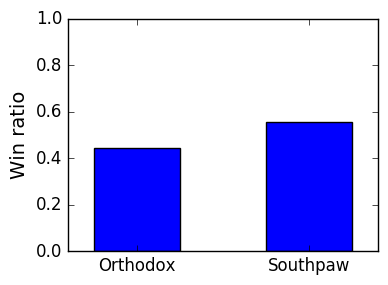

In [16]:
fig = plt.figure(1, figsize=(4, 3))
win_ratio = [float(w_ortho) / total_fights, float(w_south) / total_fights]
plt.bar(range(cont_table.shape[1]), win_ratio, width=0.5, tick_label=cont_table.columns, align='center')
plt.ylim(0, 1)
plt.ylabel('Win ratio')

### What if reach and age are approximately the same?

Below we repeat the calculation only considering fights where the reach differential and age differential are small.

In [17]:
stance_reach = ortho_south.copy()

stance_reach['ReachDiff'] = np.abs(stance_reach.Reach - stance_reach.Reach_L)
stance_reach['AgeDiff'] = np.abs(stance_reach.Age - stance_reach.Age_L)
stance_reach = stance_reach[(stance_reach.ReachDiff <= 3.0) & (stance_reach.AgeDiff <= 3.0)]

w_ortho = stance_reach[stance_reach.Stance == 'Orthodox'].shape[0]
w_south = stance_reach[stance_reach.Stance == 'Southpaw'].shape[0]
l_ortho = stance_reach[stance_reach.Stance_L == 'Orthodox'].shape[0]
l_south = stance_reach[stance_reach.Stance_L == 'Southpaw'].shape[0]

In [18]:
cols = ['Winner', 'Stance', 'AgeThen', 'Reach', 'Loser', 'Stance_L', 'AgeThen_L', 'Reach_L', 'Date']
top25 = stance_reach.sort_values('Date', ascending=False).reset_index(drop=True)[cols]
top25.AgeThen = top25.AgeThen.apply(lambda x: round(x, 1))
top25.AgeThen_L = top25.AgeThen_L.apply(lambda x: round(x, 1))
top25.Reach = top25.Reach.astype(int)
top25.Reach_L = top25.Reach_L.astype(int)
top25.index = range(1, top25.shape[0] + 1)
top25.columns = ['Winner', 'Stance', 'Age', 'Reach', 'Loser', 'Stance','Age','Reach', 'Date']
top25.to_latex('report/ortho_vs_south_same_age_reach_RAW.tex')
top25

,Winner,Stance,Age,Reach,Loser,Stance,Age,Reach,Date
1,Germaine de Randamie,Orthodox,32.8,71,Holly Holm,Southpaw,35.3,69,2017-02-11
2,Jason Gonzalez,Southpaw,26.9,74,JC Cottrell,Orthodox,27.2,71,2017-01-28
3,Tony Martin,Orthodox,27.1,73,Alex White,Southpaw,28.2,71,2017-01-15
4,Colby Covington,Orthodox,28.8,72,Bryan Barberena,Southpaw,27.6,72,2016-12-17
5,Demetrious Johnson,Orthodox,30.3,64,Tim Elliott,Southpaw,29.9,65,2016-12-03
6,Joseph Benavidez,Southpaw,32.3,65,Henry Cejudo,Orthodox,29.8,64,2016-12-03
7,Danielle Taylor,Orthodox,27.1,60,Seohee Ham,Southpaw,29.7,62,2016-11-26
8,Thomas Almeida,Southpaw,25.3,70,Albert Morales,Orthodox,25.5,72,2016-11-19
9,Khabib Nurmagomedov,Orthodox,28.1,70,Michael Johnson,Southpaw,30.4,73,2016-11-12
10,Jim Miller,Southpaw,33.2,71,Thiago Alves,Orthodox,33.1,70,2016-11-12


In [19]:
total_fights = stance_reach.shape[0]
total_fights

328

In [20]:
unique_fighters = stance_reach.Winner.append(stance_reach.Loser).unique()
unique_fighters.size

365

In [21]:
cont_table = pd.DataFrame([[w_ortho, w_south], [l_ortho, l_south]])
cont_table.columns = ['Orthodox', 'Southpaw']
cont_table.index=['Wins', 'Losses']
cont_table

,Orthodox,Southpaw
Wins,137,191
Losses,191,137


In [22]:
cont_table / cont_table.sum(axis=0)

,Orthodox,Southpaw
Wins,0.417683,0.582317
Losses,0.582317,0.417683


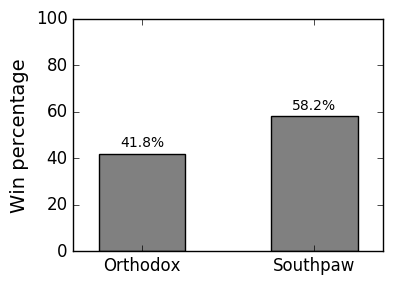

In [23]:
fig = plt.figure(1, figsize=(4, 3))
win_ratios = [100 * float(w_ortho) / total_fights, 100 * float(w_south) / total_fights]
plt.bar(range(cont_table.shape[1]), win_ratios, width=0.5, color='gray', tick_label=cont_table.columns, align='center')
plt.ylim(0, 100)
plt.ylabel('Win percentage')
plt.text(0, 45, '41.8%', ha='center')
plt.text(1, 61, '58.2%', ha='center')
plt.savefig('report/southpaw_win_ratio.pdf', bbox_inches='tight')

In [24]:
chi_sq, p_value = chisquare(cont_table.loc['Wins'])
print chi_sq, p_value, p_value > 0.05

8.89024390244 0.0028669843168 False


In [25]:
p_value = 2 * binom.cdf(k=w_ortho, n=total_fights, p=0.5)
p_value

0.0033666551641158091

We see that the null hypothesis should be rejected in favor of the alternative. That is, southpaws have a significant advantage when all else is equal.

### Are there more lefties among the ranked fighters?

In [26]:
with open('data/ranked_ufc_fighters_1488838405.txt') as f:
     ranked = f.readlines()
ranked = [fighter.strip() for fighter in ranked]

In [27]:
rf = pd.DataFrame(ranked)
rf.columns = ['Name']
rf['Ranked'] = 1

In [28]:
af = pd.read_csv('data/weight_class_majority.csv', header=0)
ranked_active = rf.merge(af[af.Active == 1], on='Name', how='right')
ranked_active.head(3)

,Name,Ranked,WeightClassMajority,Active
0,Demetrious Johnson,1.0,Flyweight,1.0
1,Joseph Benavidez,1.0,Flyweight,1.0
2,Henry Cejudo,1.0,Flyweight,1.0


In [29]:
stance_ranked = fighters.merge(ranked_active, on='Name', how='right')
stance_ranked.head(3)[['Name', 'Ranked', 'Stance']]

,Name,Ranked,Stance
0,Shamil Abdurakhimov,NaN,Orthodox
1,Ricardo Abreu,NaN,Orthodox
2,Jessica Aguilar,1.0,Orthodox


In [30]:
stance_ranked.shape[0]

515

In [31]:
overall = stance_ranked.Stance.value_counts()
overall

Orthodox    359
Southpaw    100
Switch       18
Name: Stance, dtype: int64

In [32]:
overall['Southpaw'] / float(overall.sum())

0.20964360587002095

In [33]:
among_ranked = stance_ranked[pd.notnull(stance_ranked.Ranked)].Stance.value_counts()
among_ranked

Orthodox    114
Southpaw     33
Switch        4
Name: Stance, dtype: int64

In [34]:
among_ranked['Southpaw'] / float(among_ranked.sum())

0.2185430463576159

### How has the composition of southpaws changed over time?

In [43]:
df['Year'] = df.Date.dt.year
w_stance_year = df[['Stance', 'Year']]
l_stance_year = df[['Stance_L', 'Year']]
l_stance_year.columns = ['Stance', 'Year']
cmb = w_stance_year.append(l_stance_year)

In [44]:
year_stance = pd.crosstab(index=cmb["Year"], columns=cmb["Stance"])
year_stance['Total'] = year_stance.sum(axis=1) # compute total before other
year_stance['Other'] = year_stance['Open Stance'] + year_stance['Sideways'] + year_stance['Switch']
year_stance

Stance,Open Stance,Orthodox,Sideways,Southpaw,Switch,Total,Other
Year,,,,,,,
1993,0,11,0,4,0,15,0
1994,1,26,3,21,1,52,5
1995,0,45,1,15,7,68,8
1996,0,68,1,4,5,78,6
1997,0,45,0,19,10,74,10
1998,0,38,0,2,4,44,4
1999,1,75,0,7,1,84,2
2000,0,67,0,14,2,83,2
2001,0,60,0,19,1,80,1


There are 4068 fights so let's check if the table was formed correctly:

In [45]:
year_stance.Total.sum()

7841

In [46]:
df[['Stance', 'Stance_L']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4068 entries, 0 to 4067
Data columns (total 2 columns):
Stance      3947 non-null object
Stance_L    3894 non-null object
dtypes: object(2)
memory usage: 95.3+ KB


The count looks good so let's plot the data:

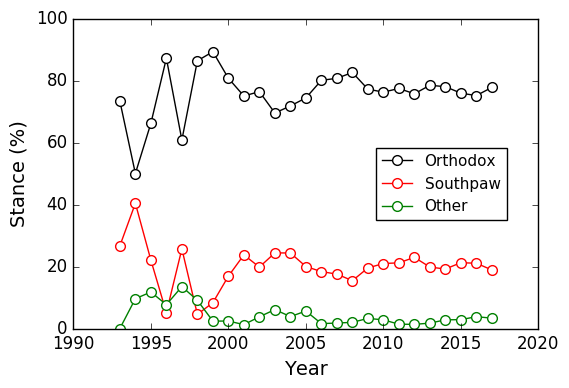

In [59]:
plt.plot(year_stance.index, 100 * year_stance.Orthodox / year_stance.Total, 'k-', marker='o', mfc='w', mec='k', label='Orthodox')
plt.plot(year_stance.index, 100 * year_stance.Southpaw / year_stance.Total, 'r-', marker='o', mfc='w', mec='r', label='Southpaw')
plt.plot(year_stance.index, 100 * year_stance.Other / year_stance.Total, 'g-', marker='o', mfc='w', mec='g', label='Other')
plt.ylim(0, 100)
plt.xlabel('Year')
plt.ylabel('Stance (%)')
plt.legend(loc=(0.65, 0.35), fontsize=11, markerscale=1)
plt.savefig('report/stance_type_by_year.pdf', bbox_inches='tight')

In [58]:
x = 100 * year_stance.Southpaw / year_stance.Total
x.loc[2005:2016].mean()

19.769165690839756